In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


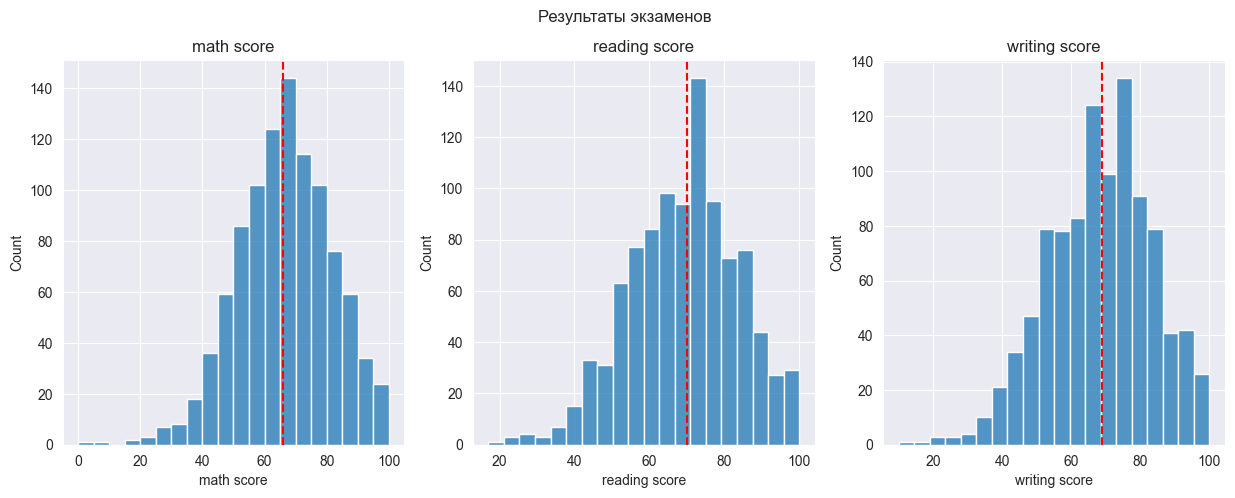

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов')
sns.histplot(ax=axes[0], data=df, x='math score', bins=20)
axes[0].axvline(df['math score'].median(), color='red', linestyle='--')
axes[0].set_title('math score')
sns.histplot(ax=axes[1], data=df, x='reading score', bins=20)
axes[1].axvline(df['reading score'].median(), color='red', linestyle='--')
axes[1].set_title('reading score')
sns.histplot(ax=axes[2], data=df, x='writing score', bins=20)
axes[2].axvline(df['writing score'].median(), color='red', linestyle='--')
axes[2].set_title('writing score')
plt.show()


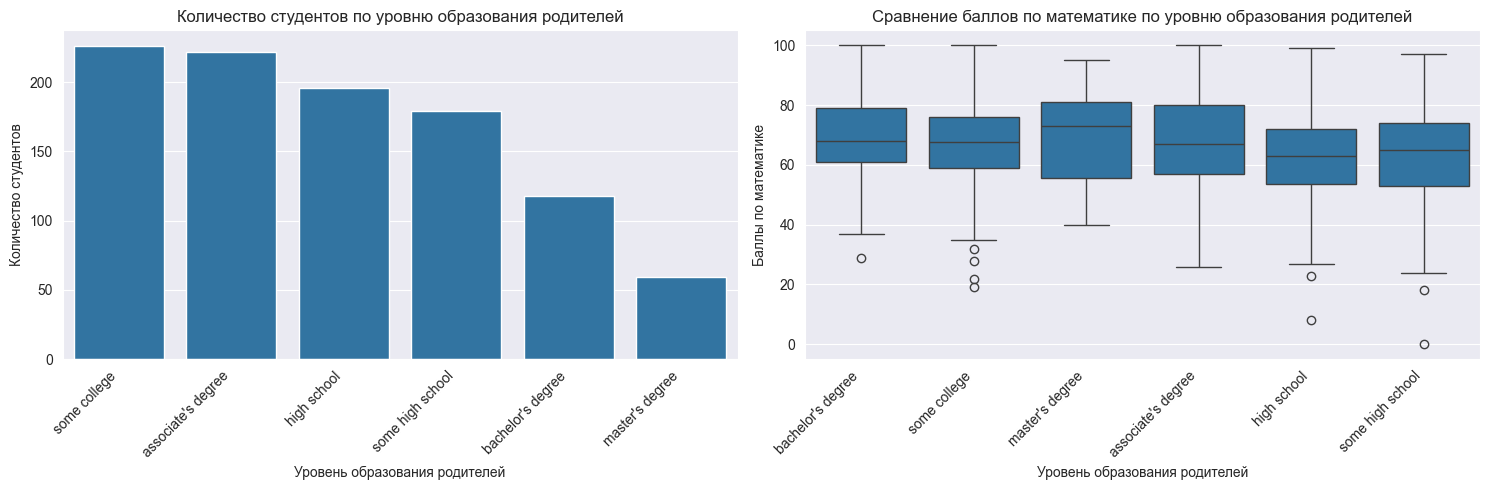

Баллы по математике у детей с разным образованием родителей отличаются, но не сильно


In [5]:
education_counts = df['parental level of education'].value_counts()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.title('Количество студентов по уровню образования родителей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.title('Сравнение баллов по математике по уровню образования родителей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
print('Баллы по математике у детей с разным образованием родителей отличаются, но не сильно')

In [6]:
df['total_score'] = df['reading score'] + df['writing score'] + df['math score']
filtered_df = df[df['total_score'] > 270]

len(filtered_df[filtered_df['gender'] == 'female'])

36

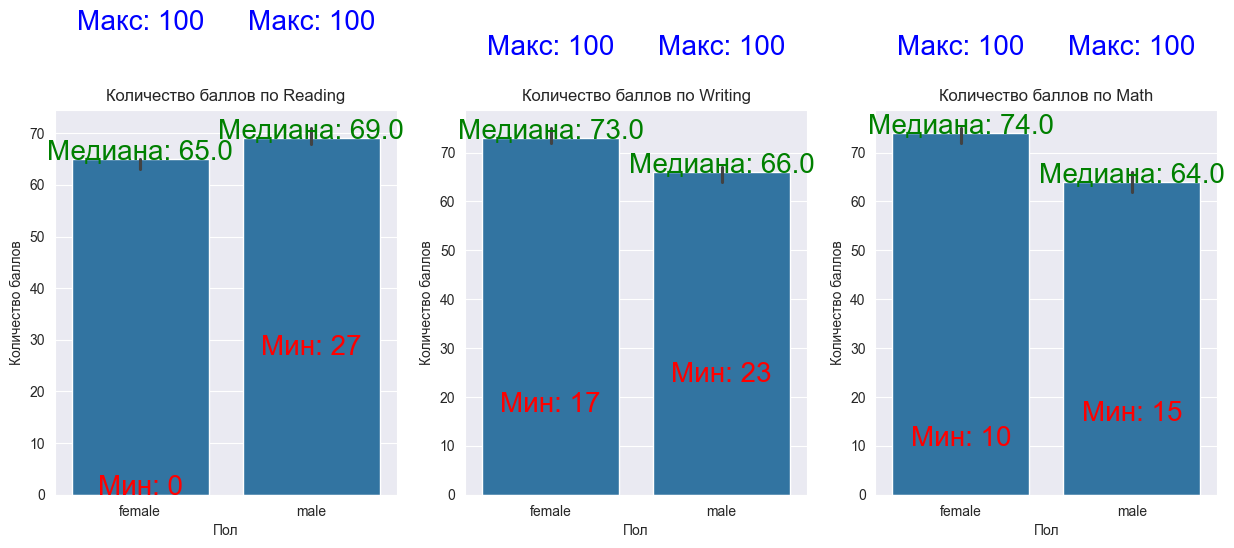

In [7]:
exams = ['math score', 'reading score', 'writing score']
exam_labels = ['Reading', 'Writing', 'Math']

plt.figure(figsize=(15, 5))

for i, exam in enumerate(exams):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=df, x='gender', y=exam, estimator='median')
    plt.title(f"Количество баллов по {exam_labels[i]}")
    plt.xlabel("Пол")
    plt.ylabel("Количество баллов")

    median_scores = df.groupby('gender')[exam].median()
    max_scores = df.groupby('gender')[exam].max()
    min_scores = df.groupby('gender')[exam].min()

    for j, gender in enumerate(df['gender'].unique()):
        plt.text(j, median_scores[gender], f"Медиана: {median_scores[gender]}", ha='center', fontsize=20, color='green')
        plt.text(j, min_scores[gender], f"Мин: {min_scores[gender]}", ha='center', fontsize=20, color='red')
        plt.text(j, 90, f'Макс: {max_scores[gender]}', ha='center', fontsize=20, color='blue')

plt.show()

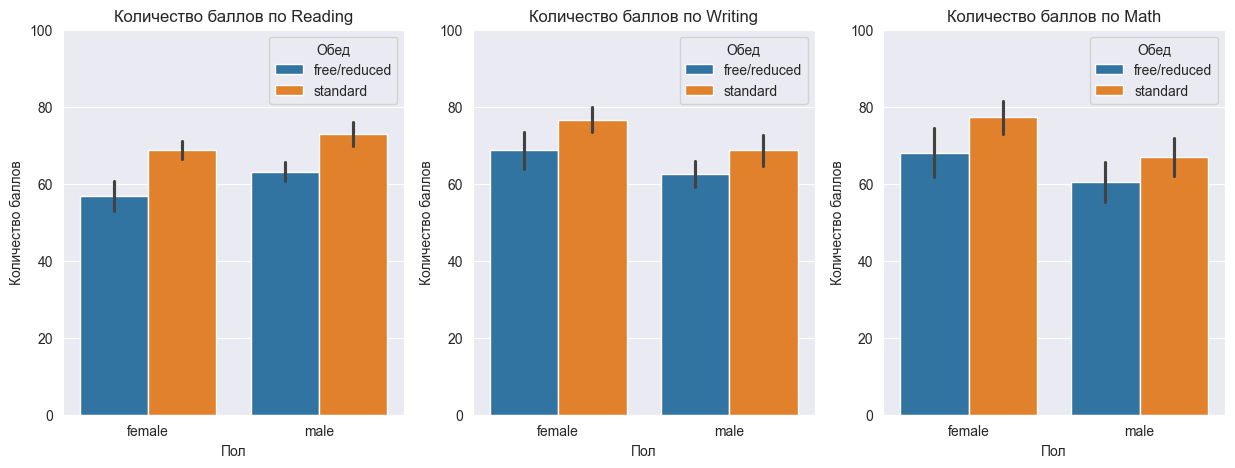

In [8]:
exams = ['math score', 'reading score', 'writing score']
exam_labels = ['Reading', 'Writing', 'Math']

with_lunch = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()

plt.figure(figsize=(15, 5))

for i, exam in enumerate(exams):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='gender', y=exam, hue='lunch', data=with_lunch, estimator='median')
    plt.title(f"Количество баллов по {exam_labels[i]}")
    plt.xlabel("Пол")
    plt.ylabel("Количество баллов")
    plt.legend(title='Обед', loc='upper right')
    plt.ylim(0, 100)


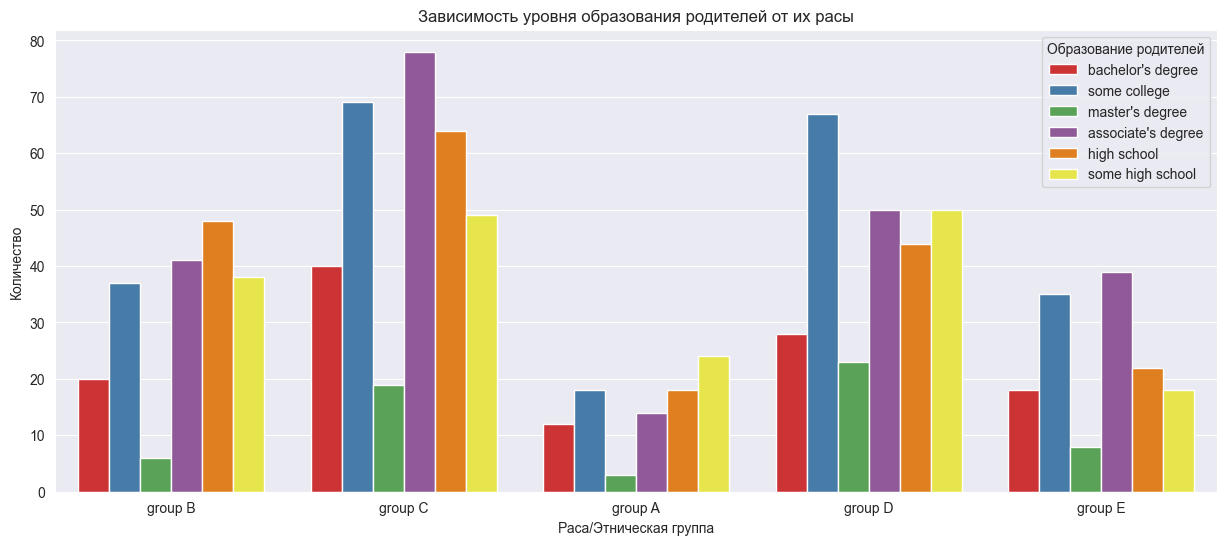

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(x='race/ethnicity', hue='parental level of education', data=df, palette='Set1')

plt.xlabel('Раса/Этническая группа')
plt.ylabel('Количество')
plt.title('Зависимость уровня образования родителей от их расы')
plt.legend(title='Образование родителей', loc='upper right')

plt.show()

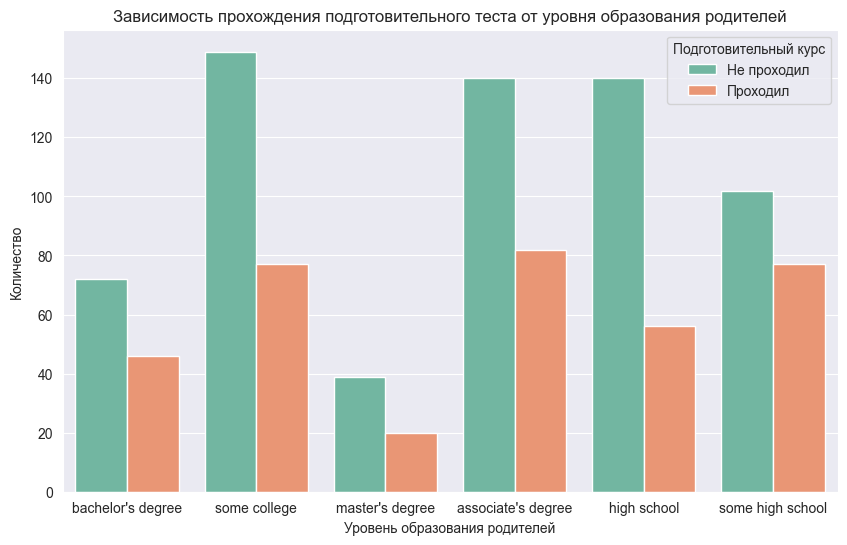

Дети, родители которых получили степень бакалавра\магистра, чаще ходят на курсы


In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df, palette='Set2')

plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.legend(title='Подготовительный курс', loc='upper right', labels=['Не проходил', 'Проходил'])

plt.show()
print('Дети, родители которых получили степень бакалавра\магистра, чаще ходят на курсы')

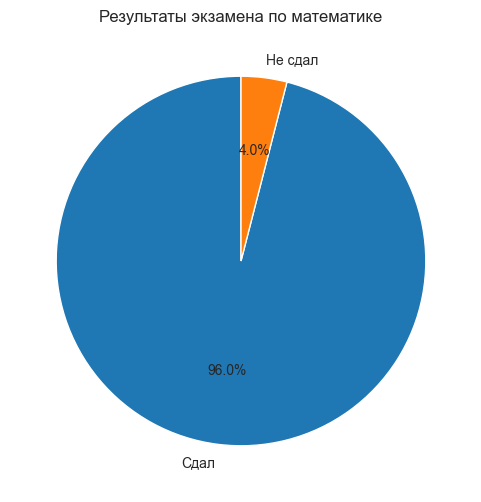

In [15]:
df['pass math exam'] = df['math score'] >= 40

passed = df['pass math exam'].sum()
failed = len(df) - passed

labels = ['Сдал', 'Не сдал']
sizes = [passed, failed]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Результаты экзамена по математике')

plt.show()

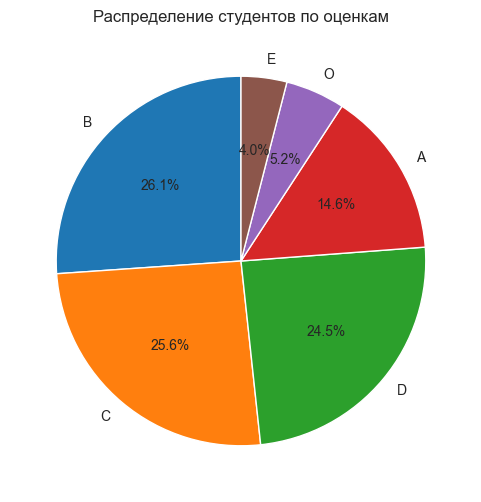

In [16]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def calculate_grade(average_score, math_score):
    if math_score < 40:
        return 'E'
    elif average_score >= 90:
        return 'O'
    elif average_score >= 80:
        return 'A'
    elif average_score >= 70:
        return 'B'
    elif average_score >= 60:
        return 'C'
    else:
        return 'D'

df['grade'] = df.apply(lambda row: calculate_grade(row['average score'], row['math score']), axis=1)
grade_counts = df['grade'].value_counts()

labels = grade_counts.index
sizes = grade_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение студентов по оценкам')

plt.show()

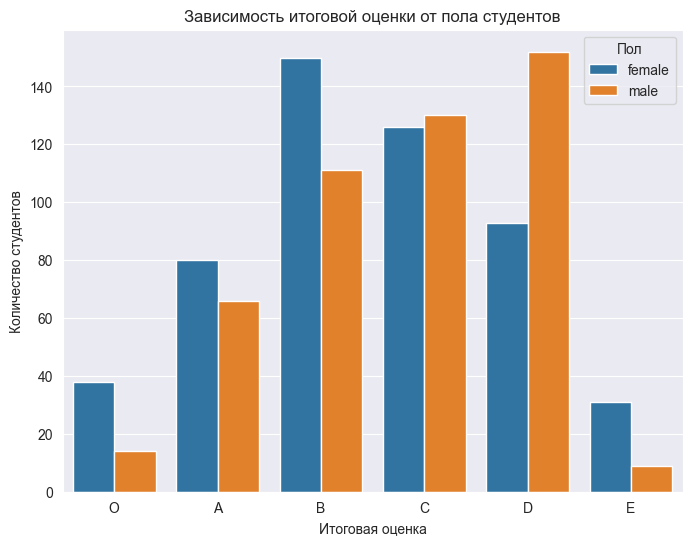

In [17]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def calculate_grade(average_score, math_score):
    if math_score < 40:
        return 'E'
    elif average_score >= 90:
        return 'O'
    elif average_score >= 80:
        return 'A'
    elif average_score >= 70:
        return 'B'
    elif average_score >= 60:
        return 'C'
    else:
        return 'D'

df['grade'] = df.apply(lambda row: calculate_grade(row['average score'], row['math score']), axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='gender', data=df, order=['O', 'A', 'B', 'C', 'D', 'E'])

plt.title('Зависимость итоговой оценки от пола студентов')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')

plt.legend(title='Пол', loc='upper right')

plt.show()